<a href="https://colab.research.google.com/github/ChaurasiyaRahul123/js_programs/blob/main/MLPrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML 1

In [ ]:
# import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# import cv2
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
from keras.utils import to_categorical
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
# model building
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
loss, accuracy = model.evaluate(x_test, y_test)
print("The model has a loss of: ", loss)
print("The model has an accuracy of about: ",accuracy*100,"%")

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-

ML 2

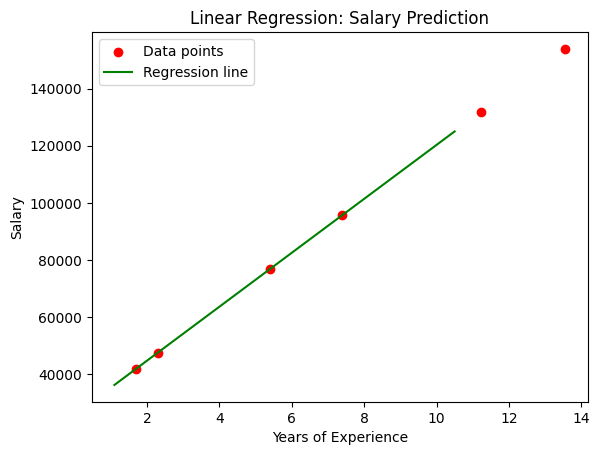

(9449.962321455077, 25792.20019866868)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
dataset = pd.read_csv("Salary_Data.csv")
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values  # Assuming the target variable (salary) is in the second column

# Calculate coefficients using the correct formula approach
n = len(X)
sum_y = np.sum(y)
sum_x = np.sum(X)
sum_x2 = np.sum(X**2)
sum_xy = np.sum(X*y)

a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

# Predict for test data
x_test = np.array([1.7, 2.3, 5.4, 7.4, 11.23, 13.56])
y_pred = a * x_test + b

# Plotting the data points and the regression line
plt.scatter(x_test, y_pred, color='red', label='Data points')  # Plot the actual data points
# plt.plot(x_test, y_pred, color='blue', label='Regression predictions')  # Plot regression predictions
plt.plot(X, a * X + b, color='green', label='Regression line')  # Plot the full regression line
plt.title('Linear Regression: Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

a, b


ML 3

In [ ]:
import numpy as np
# Example data
n = 5
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([2, 4, 8, 12, 20])
y = np.array([0, 0, 0, 1, 1])
# Initial coefficients
b0 = 0
b1 = 0
b2 = 0
s = 0.5 # Threshold
p = []
pc = []
# Gradient descent loop
for i in range(n):
  p_i = 1 / (1 + np.exp(-b0 + b1 * x1[i] + b2 * x2[i]))
  p.append(p_i)
  b0 = b0 + s * (y[i] - p_i) * p_i * (1 - p_i) * 1
  b1 = b1 + s * (y[i] - p_i) * p_i * (1 - p_i) * x1[i]
  b2 = b2 + s * (y[i] - p_i) * p_i * (1 - p_i) * x2[i]
if p_i > s:
  pc.append(1)
else:
  pc.append(0)
print("Updated coefficients b0:", b0,"b1: ", b1, "b2: ",b2)
# print("Predictions:", pc)
print("x1: ", x1, "x2: ",x2, "actual class: ",y, "predicted class: ",p)
print("x1: ", x1)
print("x2: ", x2)
print("Actual Class: ", y)
print("Predicted values: ", p)
print("Predicted Class: ", pc)

Updated coefficients b0: -0.14613612172726037 b1:  -0.23975980926557228 b2:  -0.49949474964089935
x1:  [1 2 3 4 5] x2:  [ 2  4  8 12 20] actual class:  [0 0 0 1 1] predicted class:  [0.5, 0.6370307944803831, 0.9791631250462937, 0.9988951465165977, 0.999983994433299]
x1:  [1 2 3 4 5]
x2:  [ 2  4  8 12 20]
Actual Class:  [0 0 0 1 1]
Predicted values:  [0.5, 0.6370307944803831, 0.9791631250462937, 0.9988951465165977, 0.999983994433299]
Predicted Class:  [1]


ML 4

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
cancer = load_breast_cancer()
cancer
cancer.data.shape
cancer.target
from sklearn.model_selection import train_test_split
x = cancer.data[:, :2]
y = cancer.target
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , y_pred)
print("Accuracy:",accuracy)
from sklearn.metrics import precision_score
precision = precision_score(y_test , y_pred)
print("Precision:",precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test , y_pred)
print("Recall:",recall)
from sklearn.metrics import f1_score
f1_score = f1_score(y_test , y_pred)
print("F1_score:",f1_score)

Accuracy: 0.9020979020979021
Precision: 0.9222222222222223
Recall: 0.9222222222222223
F1_score: 0.9222222222222223


ML 5

In [ ]:
def hebbian_learning(samples):
  print(f'{"INPUT":^8} {"TARGET":^16}{"WEIGHT CHANGES":^15}{"WEIGHTS":^25}')
  w1, w2, b = 0, 0, 0
  print(' ' * 45, f'({w1:2}, {w2:2}, {b:2})')
  for x1, x2, y in samples:
    w1 = w1 + x1 * y
    w2 = w2 + x2 * y
    b = b + y
    print(f'({x1:2}, {x2:2}) {y:2} ({x1*y:2}, {x2*y:2}, {y:2}) ({w1:2}, {w2:2}, {b:2})')
AND_samples = {
'binary_input_binary_output': [
[1, 1, 1],
[1, 0, 0],
[0, 1, 0],
[0, 0, 0]
]
}
OR_samples = {
'bipolar_input_bipolar_output': [
[ 1, 1, 1],
[ 1, -1, 1],
[-1, 1, 1],
[-1, -1, -1]
]
}
hebbian_learning(AND_samples['binary_input_binary_output'])

 INPUT        TARGET     WEIGHT CHANGES          WEIGHTS         
                                              ( 0,  0,  0)
( 1,  1)  1 ( 1,  1,  1) ( 1,  1,  1)
( 1,  0)  0 ( 0,  0,  0) ( 1,  1,  1)
( 0,  1)  0 ( 0,  0,  0) ( 1,  1,  1)
( 0,  0)  0 ( 0,  0,  0) ( 1,  1,  1)


ML 7

In [ ]:
class MPNeuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def predict(self, inputs):
        """Predict the output for a given input using the MP Neuron model."""
        weighted_sum = sum(w * i for w, i in zip(self.weights, inputs))
        return 1 if weighted_sum >= self.threshold else 0

if __name__ == "__main__":
    print("MP Neuron Model for AND Gate with Custom Weights")

    w1 = float(input("Enter weight for input 1: "))
    w2 = float(input("Enter weight for input 2: "))
    weights = [w1, w2]

    threshold = float(input("Enter the threshold value: "))

    neuron = MPNeuron(weights, threshold)

    inputs_list = [
        [0, 0], [0, 1], [1, 0], [1, 1]
    ]
    t = [0, 0, 0, 1]

    print("\nResults:")
    print("Input -> Actual Output : Expected Output")
    for inputs, expected in zip(inputs_list, t):
        output = neuron.predict(inputs)
        correctness = "Correct" if output == expected else "Wrong"
        print(f"{inputs} -> {output} : {expected} ({correctness})")



MP Neuron Model for AND Gate with Custom Weights
Enter weight for input 1: 0.5
Enter weight for input 2: 0.5
Enter the threshold value: 1

Results:
Input -> Actual Output : Expected Output
[0, 0] -> 0 : 0 (Correct)
[0, 1] -> 0 : 0 (Correct)
[1, 0] -> 0 : 0 (Correct)
[1, 1] -> 1 : 1 (Correct)


ML 8

In [ ]:
import numpy as np

class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def activation_function(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)


# Instantiate the perceptron with a higher number of epochs to ensure learning
slp = SingleLayerPerceptron(learning_rate=0.1, epochs=50)

# Training data for AND gate
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([-1, -1, -1, 1])  # Outputs for AND gate: false (-1), false (-1), false (-1), true (1)

# Training the perceptron
slp.fit(X_train, y_train)

# Predicting with the trained perceptron to test if it has learned the AND logic
predictions = slp.predict(X_train)

# Correcting the access to internal variables
weights = slp.weights
bias = slp.bias

# Display the weights, bias, and predictions
weights, bias, predictions



(array([0.4, 0.2]), -0.4000000000000001, array([-1, -1, -1,  1]))

ML 9

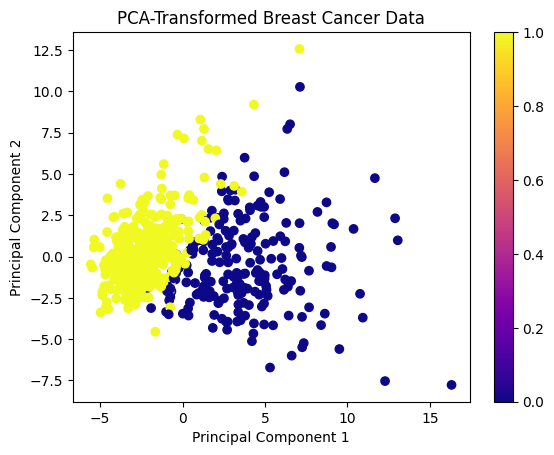

Accuracy: 0.9824561403508771
Recall: 0.9814814814814815
F1-Score: 0.986046511627907


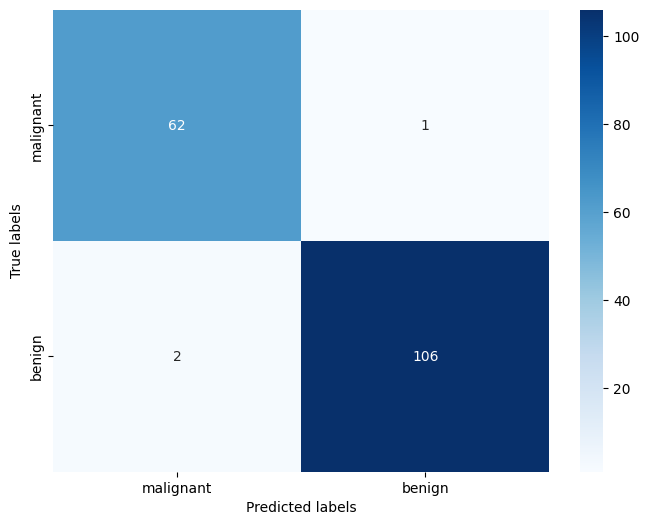

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

breast_cancer = load_breast_cancer()
data = pd.DataFrame(data=np.c_[breast_cancer['data'], breast_cancer['target']],
        columns=np.append(breast_cancer['feature_names'], ['target']))

data['target'] = data['target'].astype('category')

features = breast_cancer['feature_names']
data_std = StandardScaler().fit_transform(data[features])

# PCA transformation
pca = PCA(n_components=27)
data_pca = pca.fit_transform(data_std)

# Scatter plot of PCA-transformed data
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['target'].cat.codes, cmap='plasma')
plt.title('PCA-Transformed Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(data_pca, data['target'].cat.codes, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



pca 1

In [1]:
pip install numpy sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Explained variance ratio by sklearn PCA:  [0.72962445 0.22850762]
Explained variance ratio by manual PCA:  [0.72962445 0.22850762]


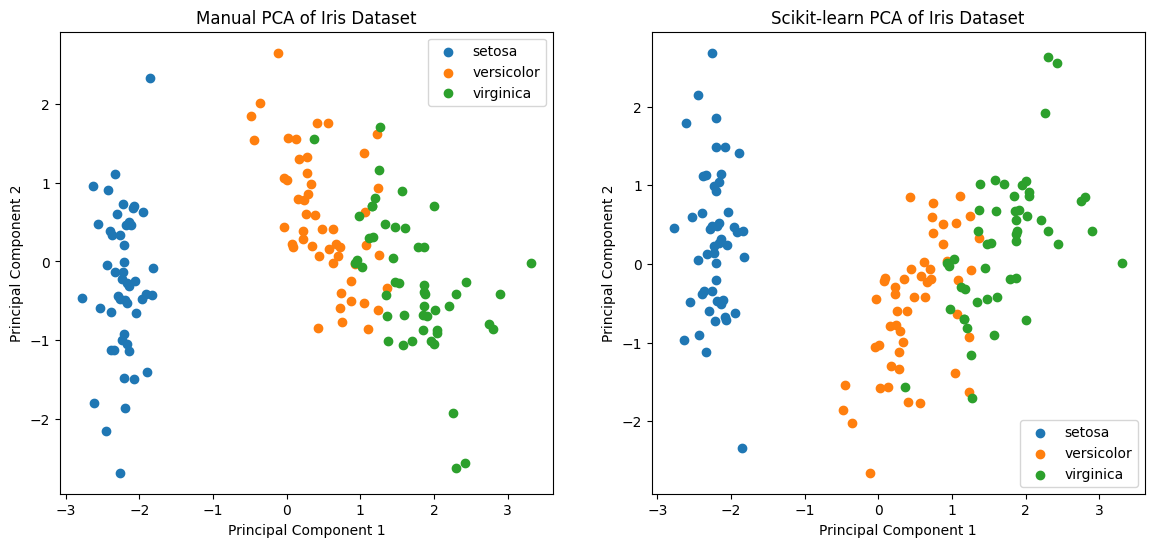

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load iris dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Calculate the covariance matrix
cov_matrix = np.cov(X_std.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and corresponding eigenvectors in decreasing order
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalue = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Select the first n eigenvectors, n is desired dimension of output dataset (new features)
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

# Transform the data
X_reduced = np.dot(X_std, eigenvector_subset)

# Using sklearn PCA for validation
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# The explained variance tells you how much information (variance) can be attributed to each of the principal components
print('Explained variance ratio by sklearn PCA: ', pca.explained_variance_ratio_)
print('Explained variance ratio by manual PCA: ', sorted_eigenvalue[:n_components] / sum(sorted_eigenvalue))

# Visualization
plt.figure(figsize=(14, 6))

# Plotting the manually calculated PCA
plt.subplot(1, 2, 1)
for i in np.unique(y):
    subset = X_reduced[y == i]
    plt.scatter(subset[:, 0], subset[:, 1], label=data.target_names[i])
plt.title('Manual PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plotting the sklearn PCA
plt.subplot(1, 2, 2)
for i in np.unique(y):
    subset = X_pca[y == i]
    plt.scatter(subset[:, 0], subset[:, 1], label=data.target_names[i])
plt.title('Scikit-learn PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()


Accuracy of Logistic Regression on PCA-reduced data: 91.11%


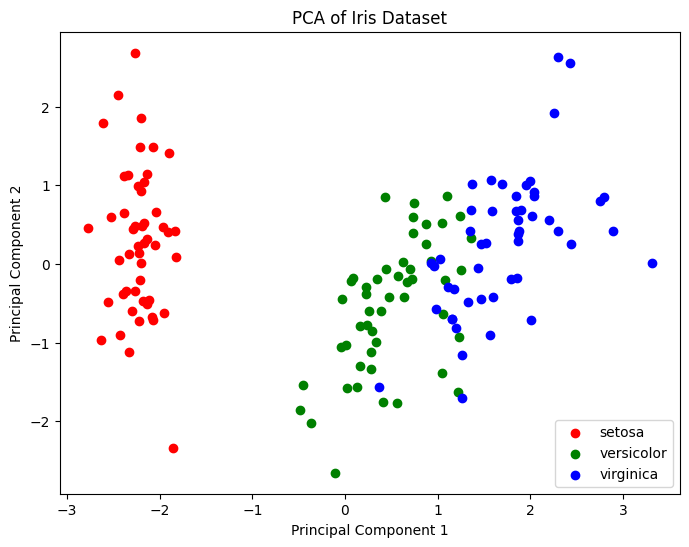

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA using sklearn
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression on PCA-reduced data: {:.2f}%'.format(accuracy * 100))

# Visualization of PCA
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=data.target_names[i])
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
